### <span style="font-family:Papyrus; font-size:1em;"> **The (second) Shortest Path to a Bar Chart Race** </span>

Pushkar Sheth

11 August 2019

<span style="font-family:calibri; font-size:0.5em;"> Sunday evening - watching The Big Bang Theory reruns (Season 7 Episode 3) </span>

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [2]:
motorvehicleprod_df2 = pd.read_csv('motorvehicleprod_df.csv', error_bad_lines=False)

In [3]:
motorvehicleprod_df2 = motorvehicleprod_df2.drop(['Unnamed: 0', '#', 'Peakproduction', 'Peakyear'], axis = 1) 

In [4]:
motorvehicleprod_df2.head()

,Country,2018,2017,2016,2015,2014,2013,2012,2011,2010,2005,2000,1995,1990,1980,1970,1960,1950
0,World,95634593.00,97302534.00,95057929.00,90780583.00,89747430.00,87507027.00,84141209.00,80092840.00,77629127.00,66482439.00,58374162.00,50046000.00,48553969.00,38564516.00,29419484.00,16488340.00,10577426.00
1,China,27809196.00,29015434.00,28118794.00,24503326.00,23722890.00,22116825.00,19271808.00,18418876.00,18264761.00,5717619.00,2069069.00,1434772.00,509242.00,222288.00,87166.00,22574.00,?
2,United States,11314705.00,11189985.00,12198137.00,12100095.00,11660699.00,11066432.00,10335765.00,8661535.00,7743093.00,11946653.00,12799857.00,11985457.00,9782997.00,8009841.00,8283949.00,7905119.00,8005859.00
3,Japan,9728528.00,9693746.00,9204590.00,9278321.00,9774558.00,9630181.00,9943077.00,8398630.00,9628920.00,10799659.00,10140796.00,10195536.00,13486796.00,11042884.00,5289157.00,481551.00,31597.00
4,India,5174645.00,4782896.00,4519341.00,4160585.00,3840160.00,3898425.00,4174713.00,3927411.00,3557073.00,1638674.00,801360.00,636000.00,362655.00,113917.00,76409.00,51136.00,14688.00


In [5]:
motorvehicleprod_df2 = motorvehicleprod_df2.set_index(motorvehicleprod_df2['Country'])
motorvehicleprod_df2 = motorvehicleprod_df2.drop(['Country'], axis = 1)
motorvehicleprod_df2

,2018,2017,2016,2015,2014,2013,2012,2011,2010,2005,2000,1995,1990,1980,1970,1960,1950
Country,,,,,,,,,,,,,,,,,
World,95634593.00,97302534.00,95057929.00,90780583.00,89747430.00,87507027.00,84141209.00,80092840.00,77629127.00,66482439.00,58374162.00,50046000.00,48553969.00,38564516.00,29419484.00,16488340.00,10577426.00
China,27809196.00,29015434.00,28118794.00,24503326.00,23722890.00,22116825.00,19271808.00,18418876.00,18264761.00,5717619.00,2069069.00,1434772.00,509242.00,222288.00,87166.00,22574.00,?
United States,11314705.00,11189985.00,12198137.00,12100095.00,11660699.00,11066432.00,10335765.00,8661535.00,7743093.00,11946653.00,12799857.00,11985457.00,9782997.00,8009841.00,8283949.00,7905119.00,8005859.00
Japan,9728528.00,9693746.00,9204590.00,9278321.00,9774558.00,9630181.00,9943077.00,8398630.00,9628920.00,10799659.00,10140796.00,10195536.00,13486796.00,11042884.00,5289157.00,481551.00,31597.00
India,5174645.00,4782896.00,4519341.00,4160585.00,3840160.00,3898425.00,4174713.00,3927411.00,3557073.00,1638674.00,801360.00,636000.00,362655.00,113917.00,76409.00,51136.00,14688.00
Germany,5120409.00,5645581.00,5746808.00,6033164.00,5907548.00,5718222.00,5649260.00,6146948.00,5905985.00,5757710.00,5526615.00,4667364.00,4976552.00,3878553.00,3842247.00,2056149.00,306064.00
Mexico,4100525.00,4068415.00,3600365.00,3565469.00,3365306.00,3054849.00,3001814.00,2681050.00,2342282.00,1684238.00,1935527.00,935017.00,820558.00,490006.00,192841.00,49807.00,0.00
South Korea,4028834.00,4114913.00,4228509.00,4555957.00,4524932.00,4521429.00,4561766.00,4657094.00,4271741.00,3699350.00,3114998.00,2526400.00,1321630.00,123135.00,28819.00,0.00,0.00
Brazil,2879809.00,2699672.00,2156356.00,2429463.00,3364890.00,3712380.00,3402508.00,3407861.00,3381728.00,2530840.00,1681517.00,1629008.00,914466.00,1165174.00,416089.00,133041.00,0.00


In [6]:
motorvehicleprod_df2.columns

Index(['2018', '2017', '2016', '2015', '2014', '2013', '2012', '2011', '2010',
       '2005', '2000', '1995', '1990', '1980', '1970', '1960', '1950'],
      dtype='object')

In [7]:
motorvehicleprod_df2.dtypes

2018    object
2017    object
2016    object
2015    object
2014    object
2013    object
2012    object
2011    object
2010    object
2005    object
2000    object
1995    object
1990    object
1980    object
1970    object
1960    object
1950    object
dtype: object

In [8]:
for col in motorvehicleprod_df2:
    motorvehicleprod_df2[col] = pd.to_numeric(motorvehicleprod_df2[col], errors='coerce')

In [9]:
motorvehicleprod_df2.dtypes

2018    float64
2017    float64
2016    float64
2015    float64
2014    float64
2013    float64
2012    float64
2011    float64
2010    float64
2005    float64
2000    float64
1995    float64
1990    float64
1980    float64
1970    float64
1960    float64
1950    float64
dtype: object

In [10]:
motorvehicleprod_df2.head()

,2018,2017,2016,2015,2014,2013,2012,2011,2010,2005,2000,1995,1990,1980,1970,1960,1950
Country,,,,,,,,,,,,,,,,,
World,95634593.0,97302534.0,95057929.0,90780583.0,89747430.0,87507027.0,84141209.0,80092840.0,77629127.0,66482439.0,58374162.0,50046000.0,48553969.0,38564516.0,29419484.0,16488340.0,10577426.0
China,27809196.0,29015434.0,28118794.0,24503326.0,23722890.0,22116825.0,19271808.0,18418876.0,18264761.0,5717619.0,2069069.0,1434772.0,509242.0,222288.0,87166.0,22574.0,NaN
United States,11314705.0,11189985.0,12198137.0,12100095.0,11660699.0,11066432.0,10335765.0,8661535.0,7743093.0,11946653.0,12799857.0,11985457.0,9782997.0,8009841.0,8283949.0,7905119.0,8005859.0
Japan,9728528.0,9693746.0,9204590.0,9278321.0,9774558.0,9630181.0,9943077.0,8398630.0,9628920.0,10799659.0,10140796.0,10195536.0,13486796.0,11042884.0,5289157.0,481551.0,31597.0
India,5174645.0,4782896.0,4519341.0,4160585.0,3840160.0,3898425.0,4174713.0,3927411.0,3557073.0,1638674.0,801360.0,636000.0,362655.0,113917.0,76409.0,51136.0,14688.0


In [11]:
motorvehicleprod_df2 = motorvehicleprod_df2.fillna(value = 0)


motorvehicleprod_df2.head()

,2018,2017,2016,2015,2014,2013,2012,2011,2010,2005,2000,1995,1990,1980,1970,1960,1950
Country,,,,,,,,,,,,,,,,,
World,95634593.0,97302534.0,95057929.0,90780583.0,89747430.0,87507027.0,84141209.0,80092840.0,77629127.0,66482439.0,58374162.0,50046000.0,48553969.0,38564516.0,29419484.0,16488340.0,10577426.0
China,27809196.0,29015434.0,28118794.0,24503326.0,23722890.0,22116825.0,19271808.0,18418876.0,18264761.0,5717619.0,2069069.0,1434772.0,509242.0,222288.0,87166.0,22574.0,0.0
United States,11314705.0,11189985.0,12198137.0,12100095.0,11660699.0,11066432.0,10335765.0,8661535.0,7743093.0,11946653.0,12799857.0,11985457.0,9782997.0,8009841.0,8283949.0,7905119.0,8005859.0
Japan,9728528.0,9693746.0,9204590.0,9278321.0,9774558.0,9630181.0,9943077.0,8398630.0,9628920.0,10799659.0,10140796.0,10195536.0,13486796.0,11042884.0,5289157.0,481551.0,31597.0
India,5174645.0,4782896.0,4519341.0,4160585.0,3840160.0,3898425.0,4174713.0,3927411.0,3557073.0,1638674.0,801360.0,636000.0,362655.0,113917.0,76409.0,51136.0,14688.0


In [12]:
motorvehicleprod_df2.reset_index(level=0, inplace=True)
motorvehicleprod_df2.head()

,Country,2018,2017,2016,2015,2014,2013,2012,2011,2010,2005,2000,1995,1990,1980,1970,1960,1950
0,World,95634593.0,97302534.0,95057929.0,90780583.0,89747430.0,87507027.0,84141209.0,80092840.0,77629127.0,66482439.0,58374162.0,50046000.0,48553969.0,38564516.0,29419484.0,16488340.0,10577426.0
1,China,27809196.0,29015434.0,28118794.0,24503326.0,23722890.0,22116825.0,19271808.0,18418876.0,18264761.0,5717619.0,2069069.0,1434772.0,509242.0,222288.0,87166.0,22574.0,0.0
2,United States,11314705.0,11189985.0,12198137.0,12100095.0,11660699.0,11066432.0,10335765.0,8661535.0,7743093.0,11946653.0,12799857.0,11985457.0,9782997.0,8009841.0,8283949.0,7905119.0,8005859.0
3,Japan,9728528.0,9693746.0,9204590.0,9278321.0,9774558.0,9630181.0,9943077.0,8398630.0,9628920.0,10799659.0,10140796.0,10195536.0,13486796.0,11042884.0,5289157.0,481551.0,31597.0
4,India,5174645.0,4782896.0,4519341.0,4160585.0,3840160.0,3898425.0,4174713.0,3927411.0,3557073.0,1638674.0,801360.0,636000.0,362655.0,113917.0,76409.0,51136.0,14688.0


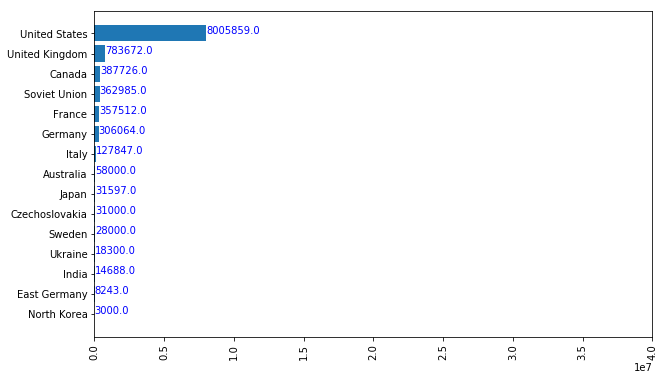

In [13]:

x1950 = motorvehicleprod_df2['Country'].values
y1950 = np.array(motorvehicleprod_df2['1950'], dtype = float)

dict_1950 = {
    "Country": x1950,
    "prod":y1950}
df_1950 = pd.DataFrame(dict_1950)
df_1950 = df_1950.sort_values(by='prod', ascending=True)
df_1950

plt.figure(figsize=(10,6))
plt.barh(df_1950['Country'][-16:-1], df_1950['prod'][-16:-1])
plt.xticks(rotation='vertical')
for i, v in enumerate(df_1950['prod'][-16:-1]):
    plt.text(v + 3, i, str(v), color='blue')
plt.xlim(0, 40000000)
plt.show()

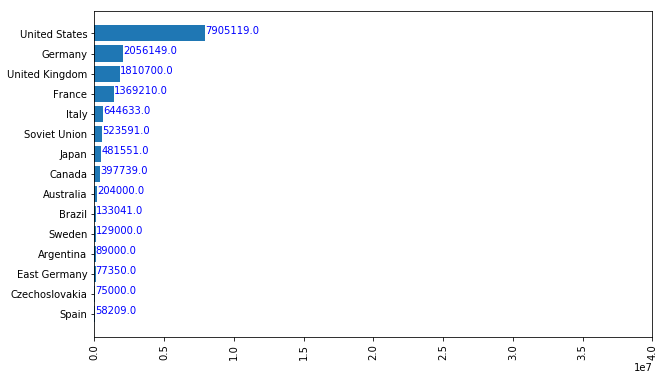

In [14]:

x1960 = motorvehicleprod_df2['Country'].values
y1960 = np.array(motorvehicleprod_df2['1960'], dtype = float)

dict_1960 = {
    "Country": x1960,
    "prod":y1960}
df_1960 = pd.DataFrame(dict_1960)
df_1960 = df_1960.sort_values(by='prod', ascending=True)
df_1960

plt.figure(figsize=(10,6))
plt.barh(df_1960['Country'][-16:-1], df_1960['prod'][-16:-1])
plt.xticks(rotation='vertical')
for i, v in enumerate(df_1960['prod'][-16:-1]):
    plt.text(v + 3, i, str(v), color='blue')
plt.xlim(0, 40000000)
plt.show()

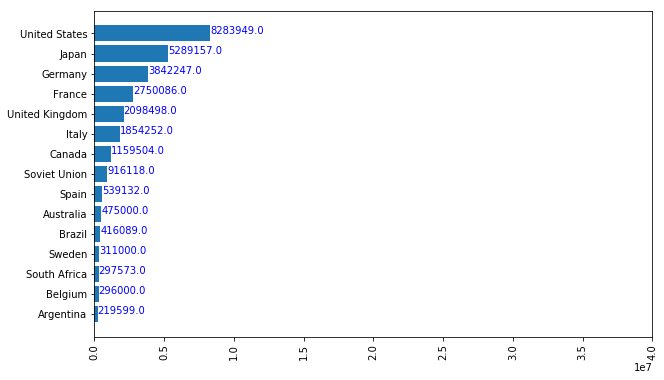

In [15]:

x1970 = motorvehicleprod_df2['Country'].values
y1970 = np.array(motorvehicleprod_df2['1970'], dtype = float)

dict_1970 = {
    "Country": x1970,
    "prod":y1970}
df_1970 = pd.DataFrame(dict_1970)
df_1970 = df_1970.sort_values(by='prod', ascending=True)
df_1970

plt.figure(figsize=(10,6))
plt.barh(df_1970['Country'][-16:-1], df_1970['prod'][-16:-1])
plt.xticks(rotation='vertical')
for i, v in enumerate(df_1970['prod'][-16:-1]):
    plt.text(v + 3, i, str(v), color='blue')
plt.xlim(0, 40000000)
plt.show()

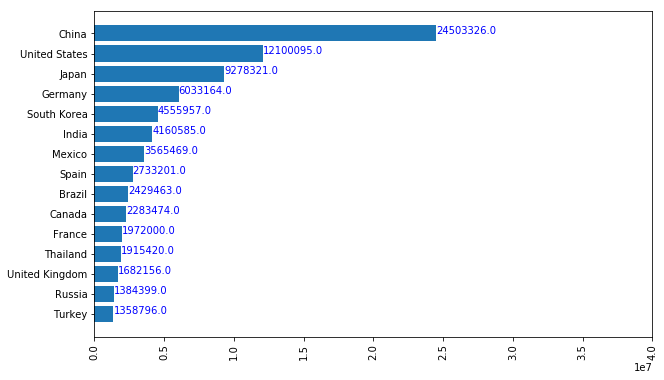

In [16]:

x2015 = motorvehicleprod_df2['Country'].values
y2015 = np.array(motorvehicleprod_df2['2015'], dtype = float)

dict_2015 = {
    "Country": x2015,
    "prod":y2015}
df_2015 = pd.DataFrame(dict_2015)
df_2015 = df_2015.sort_values(by='prod', ascending=True)
df_2015

plt.figure(figsize=(10,6))
plt.barh(df_2015['Country'][-16:-1], df_2015['prod'][-16:-1])
plt.xticks(rotation='vertical')
for i, v in enumerate(df_2015['prod'][-16:-1]):
    plt.text(v + 3, i, str(v), color='blue')
plt.xlim(0, 40000000)
plt.show()

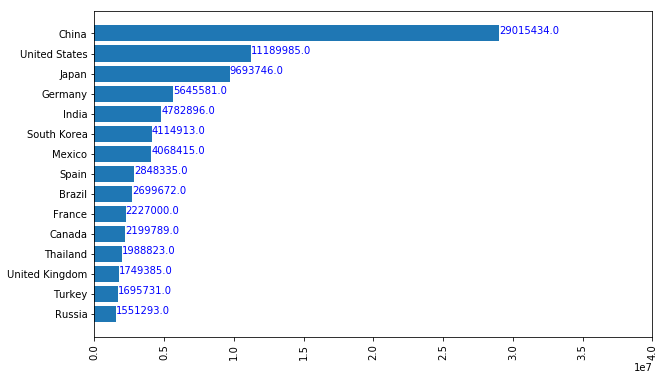

In [17]:

x2017 = motorvehicleprod_df2['Country'].values
y2017 = np.array(motorvehicleprod_df2['2017'], dtype = float)

dict_2017 = {
    "Country": x2017,
    "prod":y2017}
df_2017 = pd.DataFrame(dict_2017)
df_2017 = df_2017.sort_values(by='prod', ascending=True)
df_2017

plt.figure(figsize=(10,6))
plt.barh(df_2017['Country'][-16:-1], df_2017['prod'][-16:-1])
plt.xticks(rotation='vertical')
for i, v in enumerate(df_2017['prod'][-16:-1]):
    plt.text(v + 3, i, str(v), color='blue')
plt.xlim(0, 40000000)
plt.show()

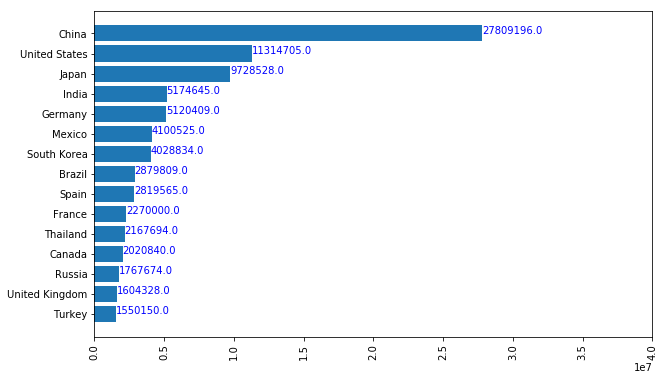

In [18]:

x2018 = motorvehicleprod_df2['Country'].values
y2018 = np.array(motorvehicleprod_df2['2018'], dtype = float)

dict_2018 = {
    "Country": x2018,
    "prod":y2018}
df_2018 = pd.DataFrame(dict_2018)
df_2018 = df_2018.sort_values(by='prod', ascending=True)
df_2018

plt.figure(figsize=(10,6))
plt.barh(df_2018['Country'][-16:-1], df_2018['prod'][-16:-1])
plt.xticks(rotation='vertical')
for i, v in enumerate(df_2018['prod'][-16:-1]):
    plt.text(v + 3, i, str(v), color='blue')
plt.xlim(0, 40000000)
plt.show()